In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score
import sys
import random
import tensorflow as tf
import keras

tf.config.experimental.list_physical_devices()
keras.backend.clear_session()

from data_wrangler import get_model_data_for_regression
from models import MODELS, get_preprocessor

MODEL_PATH = './models/'

random.seed(19)
np.random.seed(19)
tf.random.set_seed(19)

2025-11-30 12:37:08.147014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764524228.165135  347953 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764524228.170622  347953 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-30 12:37:08.197043: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = get_model_data_for_regression()
preproc = get_preprocessor()
X = preproc.fit_transform(data.drop(columns=['log_usage']))
y = data['log_usage'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
# create model
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))

filepath=MODEL_PATH + "/h5/NN_Model-{epoch:02d}-{val_loss:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

I0000 00:00:1764524295.127145  347953 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6717 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1


In [4]:
# compile model
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=['mse'])

In [5]:
train_model = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test,y_test),callbacks=[callbacks_list])

2025-11-30 12:38:32.138859: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1223876148 exceeds 10% of free system memory.
2025-11-30 12:38:38.768621: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1223876148 exceeds 10% of free system memory.


Epoch 1/10


I0000 00:00:1764524322.271610  348294 service.cc:148] XLA service 0x76668800a8b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764524322.273108  348294 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2025-11-30 12:38:42.429714: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1764524322.848078  348294 cuda_dnn.cc:529] Loaded cuDNN version 90101


   47/18531 ━━━━━━━━━━━━━━━━━━━━ 1:01 3ms/step - loss: 4.2230 - mse: 4.2230 

I0000 00:00:1764524324.180148  348294 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2676 - mse: 0.2676

2025-11-30 12:39:44.734432: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 305969424 exceeds 10% of free system memory.
2025-11-30 12:39:45.052823: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 305969424 exceeds 10% of free system memory.



Epoch 1: val_loss improved from None to 0.14414, saving model to ./models//h5/NN_Model-01-0.14.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - loss: 0.1723 - mse: 0.1723 - val_loss: 0.1441 - val_mse: 0.1441
Epoch 2/10
18523/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1445 - mse: 0.1445
Epoch 2: val_loss improved from 0.14414 to 0.14171, saving model to ./models//h5/NN_Model-02-0.14.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - loss: 0.1436 - mse: 0.1436 - val_loss: 0.1417 - val_mse: 0.1417
Epoch 3/10
18528/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1423 - mse: 0.1423
Epoch 3: val_loss improved from 0.14171 to 0.14046, saving model to ./models//h5/NN_Model-03-0.14.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - loss: 0.1417 - mse: 0.1417 - val_loss: 0.1405 - val_mse: 0.1405
Epoch 4/10
18526/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1410 - mse: 0.1410
Epoch 4: val_loss improved from 0.14046 to 0.13917, saving model to ./models//h5/NN_Model-04-0.14.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 86s 5ms/step - loss: 0.1406 - mse: 0.1406 - val_loss: 0.1392 - val_mse: 0.1392
Epoch 5/10
18527/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1399 - mse: 0.1399
Epoch 5: val_loss improved from 0.13917 to 0.13820, saving model to ./models//h5/NN_Model-05-0.14.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - loss: 0.1395 - mse: 0.1395 - val_loss: 0.1382 - val_mse: 0.1382
Epoch 6/10
18526/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1377 - mse: 0.1377
Epoch 6: val_loss improved from 0.13820 to 0.13329, saving model to ./models//h5/NN_Model-06-0.13.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - loss: 0.1363 - mse: 0.1363 - val_loss: 0.1333 - val_mse: 0.1333
Epoch 7/10
18524/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1343 - mse: 0.1343
Epoch 7: val_loss improved from 0.13329 to 0.13195, saving model to ./models//h5/NN_Model-07-0.13.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 0.1336 - mse: 0.1336 - val_loss: 0.1319 - val_mse: 0.1319
Epoch 8/10
18520/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1328 - mse: 0.1328
Epoch 8: val_loss improved from 0.13195 to 0.13116, saving model to ./models//h5/NN_Model-08-0.13.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 0.1324 - mse: 0.1324 - val_loss: 0.1312 - val_mse: 0.1312
Epoch 9/10
18515/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1321 - mse: 0.1321
Epoch 9: val_loss improved from 0.13116 to 0.13060, saving model to ./models//h5/NN_Model-09-0.13.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - loss: 0.1316 - mse: 0.1316 - val_loss: 0.1306 - val_mse: 0.1306
Epoch 10/10
18526/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1315 - mse: 0.1315
Epoch 10: val_loss did not improve from 0.13060
18531/18531 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 0.1311 - mse: 0.1311 - val_loss: 0.1308 - val_mse: 0.1308


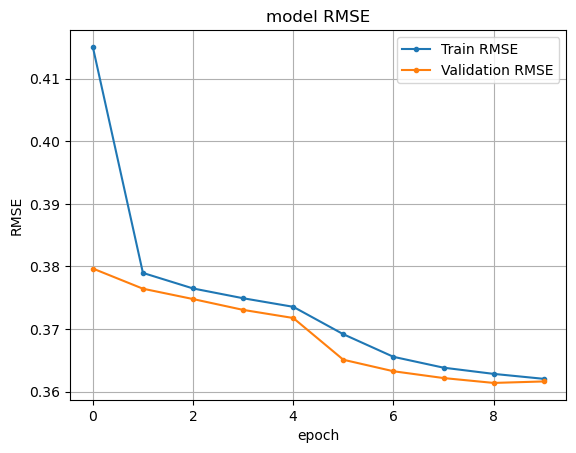

In [6]:
# Plotting the model
plt.plot(np.sqrt(train_model.history['mse']), marker='.', label='Train RMSE')
plt.plot(np.sqrt(train_model.history['val_mse']), marker='.', label='Validation RMSE')
plt.title('model RMSE')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.grid()
plt.legend(loc='upper right')
plt.savefig('nn_model_rmse.png')

In [ ]:
from models import save_model

SAVE_MODELS = False

print(model.predict(X_test[:5]))

if SAVE_MODELS:
    save_model(model, MODEL_PATH + 'MLPModel.pkl')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
[[-1.9268519 ]
 [-1.9425132 ]
 [-0.59439147]
 [-1.7797428 ]
 [-0.9231727 ]]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 8)              │         4,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,425 (17.29 KB)

 Trainable params: 4,425 (17.29 KB)

 Non-trainable params: 0 (0.00 B)

None


2025-11-30 12:55:20.001477: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1223876148 exceeds 10% of free system memory.


Epoch 1/10
18530/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2933 - mse: 0.2933
Epoch 1: val_loss improved from None to 0.13131, saving model to ./models//h5/LSTM_Model-01-0.13.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 352s 19ms/step - loss: 0.1661 - mse: 0.1661 - val_loss: 0.1313 - val_mse: 0.1313
Epoch 2/10
18530/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1298 - mse: 0.1298
Epoch 2: val_loss improved from 0.13131 to 0.12802, saving model to ./models//h5/LSTM_Model-02-0.13.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 331s 18ms/step - loss: 0.1287 - mse: 0.1287 - val_loss: 0.1280 - val_mse: 0.1280
Epoch 3/10
18527/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1271 - mse: 0.1271
Epoch 3: val_loss improved from 0.12802 to 0.12638, saving model to ./models//h5/LSTM_Model-03-0.13.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 341s 18ms/step - loss: 0.1265 - mse: 0.1265 - val_loss: 0.1264 - val_mse: 0.1264
Epoch 4/10
18530/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1257 - mse: 0.1257
Epoch 4: val_loss improved from 0.12638 to 0.12529, saving model to ./models//h5/LSTM_Model-04-0.13.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 331s 18ms/step - loss: 0.1252 - mse: 0.1252 - val_loss: 0.1253 - val_mse: 0.1253
Epoch 5/10
18529/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1249 - mse: 0.1249
Epoch 5: val_loss improved from 0.12529 to 0.12464, saving model to ./models//h5/LSTM_Model-05-0.12.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 355s 19ms/step - loss: 0.1245 - mse: 0.1245 - val_loss: 0.1246 - val_mse: 0.1246
Epoch 6/10
18529/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1243 - mse: 0.1243
Epoch 6: val_loss improved from 0.12464 to 0.12420, saving model to ./models//h5/LSTM_Model-06-0.12.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 263s 14ms/step - loss: 0.1239 - mse: 0.1239 - val_loss: 0.1242 - val_mse: 0.1242
Epoch 7/10
18531/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1238 - mse: 0.1238
Epoch 7: val_loss improved from 0.12420 to 0.12388, saving model to ./models//h5/LSTM_Model-07-0.12.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 285s 15ms/step - loss: 0.1235 - mse: 0.1235 - val_loss: 0.1239 - val_mse: 0.1239
Epoch 8/10
18528/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1234 - mse: 0.1234
Epoch 8: val_loss improved from 0.12388 to 0.12364, saving model to ./models//h5/LSTM_Model-08-0.12.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 322s 17ms/step - loss: 0.1231 - mse: 0.1231 - val_loss: 0.1236 - val_mse: 0.1236
Epoch 9/10
18529/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1232 - mse: 0.1232
Epoch 9: val_loss improved from 0.12364 to 0.12340, saving model to ./models//h5/LSTM_Model-09-0.12.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 268s 14ms/step - loss: 0.1229 - mse: 0.1229 - val_loss: 0.1234 - val_mse: 0.1234
Epoch 10/10
18527/18531 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1229 - mse: 0.1229
Epoch 10: val_loss improved from 0.12340 to 0.12315, saving model to ./models//h5/LSTM_Model-10-0.12.h5


18531/18531 ━━━━━━━━━━━━━━━━━━━━ 268s 14ms/step - loss: 0.1226 - mse: 0.1226 - val_loss: 0.1232 - val_mse: 0.1232


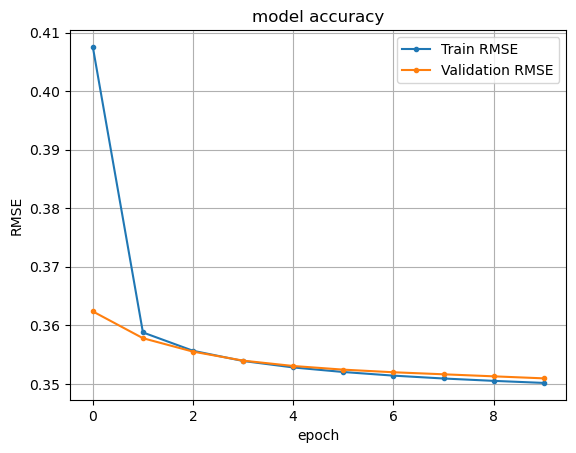

In [8]:
# Delete all previous models to free memory
keras.backend.clear_session()

# Sequential model
lstm_model = keras.models.Sequential()
lstm_model.add(keras.layers.Input(shape=(1, X.shape[1])))
lstm_model.add(keras.layers.LSTM(8, return_sequences=False))
lstm_model.add(keras.layers.LeakyReLU())
lstm_model.add(keras.layers.Dense(1, activation='linear'))

print(lstm_model.summary())

filepath=MODEL_PATH + "/h5/LSTM_Model-{epoch:02d}-{val_loss:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# compile model
lstm_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=['mse'])
train_lstm_model = lstm_model.fit(X_train.reshape((X_train.shape[0], 1, X_train.shape[1])), y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test.reshape((X_test.shape[0], 1, X_test.shape[1])),y_test),callbacks=[callbacks_list])

# Plotting the model
plt.plot(np.sqrt(train_lstm_model.history['mse']), marker='.', label='Train RMSE')
plt.plot(np.sqrt(train_lstm_model.history['val_mse']), marker='.', label='Validation RMSE')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.grid()
plt.legend(loc='upper right')
plt.savefig('lstm_model_accuracy.png')

In [ ]:
from models import save_model

SAVE_MODELS = True

print(lstm_model.predict(X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))))

if SAVE_MODELS:
    save_model(lstm_model, MODEL_PATH + 'LSTMNNModel.pkl')

18531/18531 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step
[[-1.985389  ]
 [-1.9251516 ]
 [-0.6320639 ]
 ...
 [-0.96653104]
 [-1.4185832 ]
 [-1.4289806 ]]


: 